In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from owid import catalog
from owid_datagrabber import owid_electric_car_sales
from IPython.display import display

In [2]:
def correlate_slice_normalized(a, v):
    if len(v) > len(a):
        a, v = v, a
    # fix nans
    a, v = np.nan_to_num(a), np.nan_to_num(v) 
    L, l = len(a), len(v)
    offsets = np.arange(-l+2,L+1)
    norm_by_slice_a = np.correlate(a*a, np.ones(v.shape), mode='full')
    norm_by_slice_v = np.correlate(np.ones(a.shape), v*v, mode='full')
    corrs = 2 * np.correlate(a, v, mode='full') / (norm_by_slice_a + norm_by_slice_v)
    return offsets, corrs

def df_shift_index(df, n):
    df = df.copy()
    df.index = df.index + n
    return df

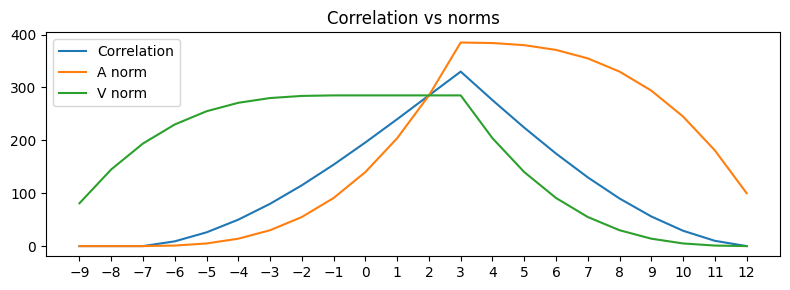

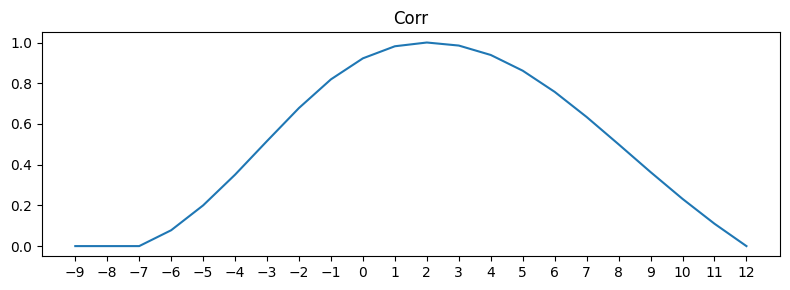

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12])

array([0.        , 0.        , 0.        , 0.07792208, 0.2       ,
       0.35087719, 0.51612903, 0.67846608, 0.81914894, 0.92235294,
       0.98159509, 1.        , 0.98507463, 0.93877551, 0.86153846,
       0.75757576, 0.63414634, 0.5       , 0.36363636, 0.232     ,
       0.10989011, 0.        ])

11


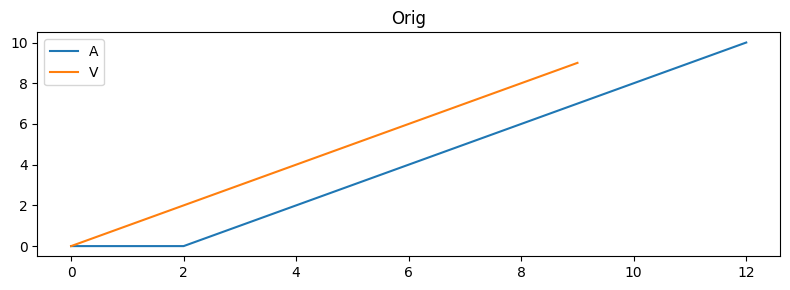

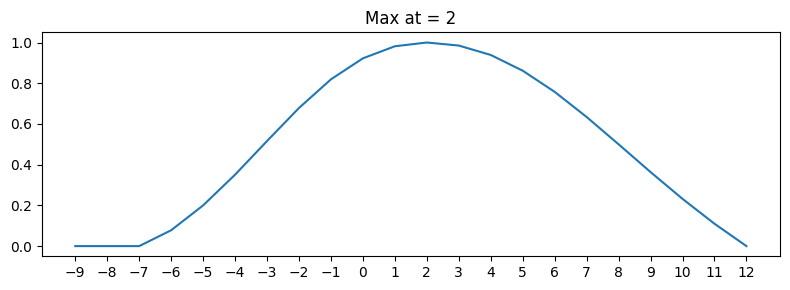

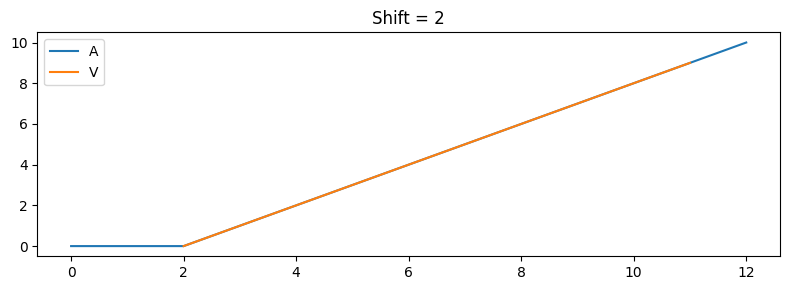

In [3]:
a = np.array([0., 0., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])
v = np.array([0, 1., 2., 3., 4., 5., 6., 7., 8., 9.])
#v = np.array([0., 1., 0.])


L, l = len(a), len(v)
offsets = np.arange(-l+1,L)
norm_by_slice_a = np.correlate(a*a, np.ones(v.shape), mode='full')
norm_by_slice_v = np.correlate(np.ones(a.shape), v*v, mode='full')


corrs = 2 * np.correlate(a, v, mode='full') / (norm_by_slice_a + norm_by_slice_v)

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(offsets, np.correlate(a, v, mode='full'), label='Correlation')
ax.plot(offsets, norm_by_slice_a, label='A norm')
ax.plot(offsets, norm_by_slice_v, label='V norm')
ax.set_title(f'Correlation vs norms')
plt.xticks(offsets)
plt.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(offsets, corrs)
ax.set_title(f'Corr')
plt.xticks(offsets)
plt.tight_layout()
plt.show()


#offsets, corrs = correlate_slice_normalized(a, v)
display(offsets)
display(corrs)
corrs = np.nan_to_num(corrs)

new_shift = offsets[np.argmax(corrs)]
print(np.argmax(corrs))

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(np.arange(0, len(a)), a, label='A')
ax.plot(np.arange(0, len(v)), v, label='V')
ax.set_title(f'Orig')
plt.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(offsets, corrs)
ax.set_title(f'Max at = {new_shift}')
plt.xticks(offsets)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(np.arange(0, len(a)), a, label='A')
ax.plot(np.arange(0+new_shift, len(v)+new_shift), v, label='V')
ax.set_title(f'Shift = {new_shift}')
plt.legend()
plt.tight_layout()
plt.show()
